In [1]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("df_final.csv")
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work,iter_hourly_rate,iter_total_working_years,iter_monthly_income,iter_salary,knn_hourly_rate,knn_total_working_years,knn_monthly_income,knn_salary
0,51,no,NaN,2015.72,NaN,6,3,NaN,1,low,female,251.967241,high,executive,research_director,high,NaN,16280.830000,42330.17,7,no,13,"3,0",high,full_time,0,30.039744,5,good,20,15,15,1972,195370.000000,yes,83.042302,11.318934,16280.830000,195370.000000,83.042302,11.318934,16280.830000,195370.000000
1,52,no,NaN,2063.39,NaN,1,4,life_sciences,2,high,female,257.925812,medium,executive,manager,high,NaN,17117.127783,43331.17,0,no,14,"3,0",low,part_time,1,34.000000,5,good,33,11,9,1971,199990.000000,yes,83.042302,34.000000,5697.600227,199990.000000,83.042302,34.000000,5697.600227,199990.000000
2,42,no,travel_rarely,1984.25,research_&_development,4,2,technical_degree,3,high,female,248.033353,high,executive,manager,very_high,married,16468.252120,41669.33,1,no,11,"3,0",very_high,part_time,0,22.000000,3,good,22,11,15,1981,192320.000000,yes,83.042302,22.000000,5697.600227,192320.000000,83.042302,22.000000,5697.600227,192320.000000
3,47,no,travel_rarely,1771.40,NaN,2,4,medical,4,low,male,221.426998,high,manager,research_director,high,married,14307.500000,37199.50,3,no,19,"3,0",medium,full_time,2,26.672707,2,good,20,5,6,1976,171690.000000,no,83.042302,11.318934,14307.500000,171690.000000,83.042302,11.318934,14307.500000,171690.000000
4,46,no,NaN,1582.77,NaN,3,3,technical_degree,5,low,male,102.958162,very_high,manager,sales_executive,low,divorced,12783.920000,33238.20,2,no,12,"3,0",very_high,part_time,1,11.260715,5,good,19,2,8,1977,79832.804746,no,83.042302,11.318934,12783.920000,65245.875313,83.042302,11.318934,12783.920000,65245.875313


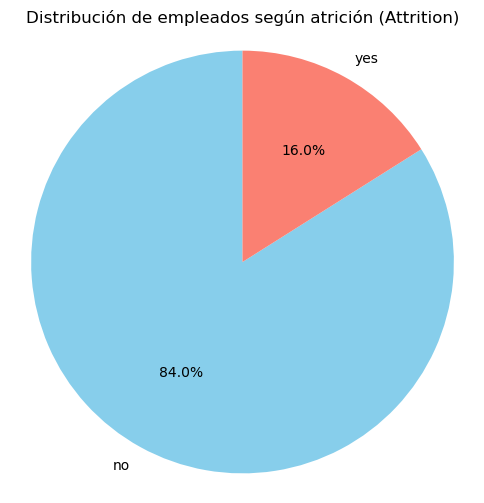

In [3]:
conteo = df['attrition'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribución de empleados según atrición (Attrition)") # cambié el nombre al de español y le dejé el de inglés entre paréntesis
plt.axis('equal')  
plt.show()

Apreciamos en el gráfico como la compañía cuenta con un porcentaje de abanadono de un 16% de empleadas frente a un 84% que permanecen en la empresa.  
(agregué) --> De este 16% entonces nos preguntamos como se distribuyen quienes rebubcian en los niveles de satisfacción con su lugar de trabajo

In [4]:
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

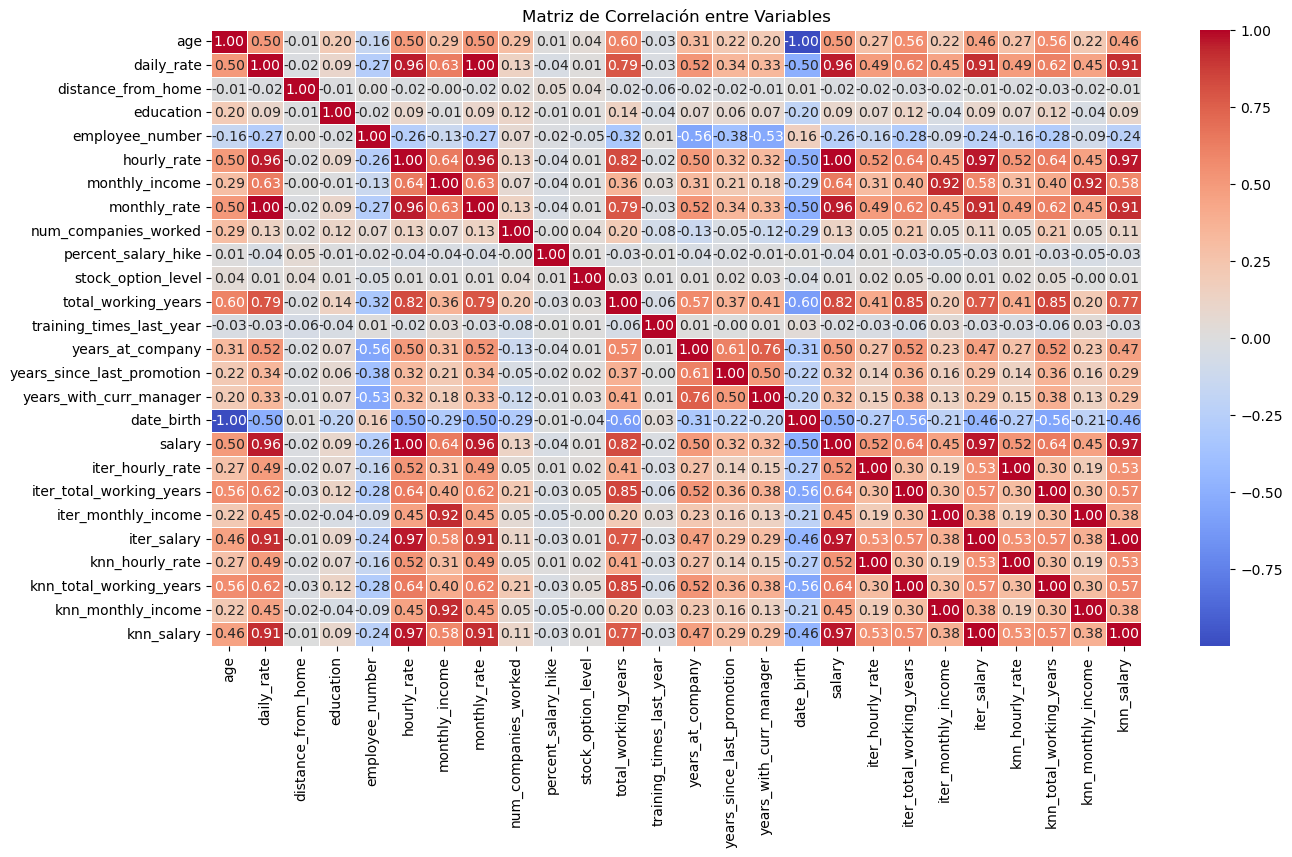

In [5]:
plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlación entre Variables')

plt.show()

Se realiza una matriz para evaluar la correlación de cada variable y poder detectar posibles datos significativos. Advertimos que algunas variables cuentan 

con un coeficiente de correlación llamativo, por lo que procedemos a analizarlas con unas visualizaciones. 

## (Manteniendo la estructura de la lógica de Gara - hago algunos cambios)
Obtenemos una matriz de calor (heat matrix) para evaluar la correlación que hay entre todas las variables, y así poder detectar posibles variables que estén altamente correlacionadas entre si, y si existen datos redundantes, o variables que expliquen diferentes aspectos.  
  
Advertimos que algunas variables cuentan con un coeficiente de correlación llamativo, como el caso de salary, daily_rate, hourly_rate y monthly_rate. Para analizar la correlación casi perfecta de estas variables inspeccionamos su relación más profundamente. Pero podemos avanzar que estas variables cuentan con ifnromación redundante, pero puedo servirnos para completar observaciones faltantes (missing values)  

Lo que nos interesa acá es identificar:
1. que variables están altamente correlacionadas entre si - aportando la misma información
2. que variables no están correlacionadas con otras - aportando variabilidad independiente a nuestras variables resultado (estas variables nos agregan información nueva para identificar posibles causas de atrición o descontento laboral)

Las variables a destacar por su alta correlación son:  
- age y salary (y todas las variables de rate ya mencionadas) - correlación positiva de más del 50%  
- age y total_working_years,  (es redundante su correlación con el año de nacimiento)
- age y salary (altamente correlacionadas) - debido al ciclo de vida y siendo este un resultado esperado teoricamente
- age y monthly_income está menos correlacionada, aportando esta información adicional del ingreso de las trabajadoras
- salary (en sus 4 formas) está correlacionada con variables
- total_working years está alatamente correlacionada con las variables esperadas como salario edad, cantidad de empresas en las que ha trabajado, año en esta empresa

Las variables a destacar por su baja correlación son:
- distance_from_home
- education (aunque un poco más correlacionada con otras variables, esta correlación está por debajo del 25%) 
- monthly_income parece ser la variable de ingreso menos relacionada con el resto, y también con otras variables, además de salary (con menos missing) esta es una candidata a variable explicativa
- percenta_salary_hike no está altamente correlacionada con las otras variables numéricas
- stock_option_level no está altamente correlacionada con las otras variables numéricas
- training_times_last_year no está altamente correlacionada con las otras variables numéricas

Otras:
- employee_number no sería una variable explicativa

## Conclusiones:  
Las variables numéricas que nos podrían servir para analizar el nivel de satisfacción y el grado de atrición dada su variabilidad independiente son:
- distance_from_home
- education
- monthly_income (parcialmente)
- percentage_salary_hike
- stock_option_lebel
- training_times_last_year  

Las variables numéricas que están correlacionadas entre si y de las que tenemos que elegir la que presente menor cantidad de missing:  
- salary y variables de rate
- age o year_of_birth

In [6]:
df[['daily_rate', 'salary','monthly_rate', 'hourly_rate']]

,daily_rate,salary,monthly_rate,hourly_rate
0,2015.72,195370.000000,42330.17,251.967241
1,2063.39,199990.000000,43331.17,257.925812
2,1984.25,192320.000000,41669.33,248.033353
3,1771.40,171690.000000,37199.50,221.426998
4,1582.77,79832.804746,33238.20,102.958162
...,...,...,...,...
1609,1065.28,103250.000000,22370.83,133.160000
1610,458.82,44470.000000,9635.17,57.350575
1611,1032.49,100071.840000,21682.23,129.060332
1612,556.26,53914.110000,11681.39,69.530781


In [7]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work',
       'iter_hourly_rate', 'iter_total_working_years', 'iter_monthly_income',
       'iter_salary', 'knn_hourly_rate', 'knn_total_working_years',
       'knn_monthly_income', 'knn_salary'],
      dtype='object')

<Axes: xlabel='knn_salary', ylabel='daily_rate'>

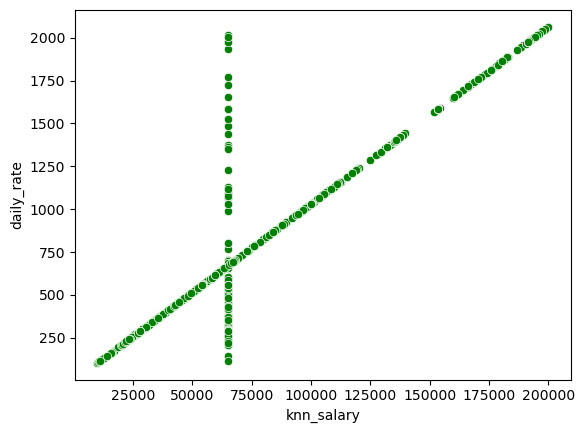

In [8]:
sns.scatterplot(x= 'knn_salary', y= 'daily_rate', color= 'green',data=df)

<Axes: xlabel='knn_salary', ylabel='knn_hourly_rate'>

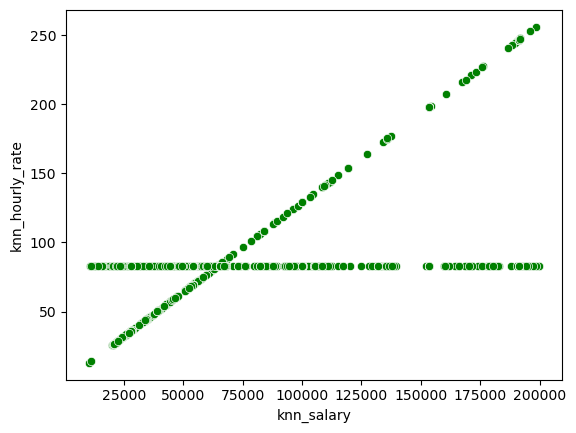

In [9]:
sns.scatterplot(x= 'knn_salary', y= 'knn_hourly_rate', color= 'green',data=df)

# Importante:
1. Identificar de los valores imputados, cuales son las caracteristicas y por que los imputamos casi todos o todos en el mismo valor
2. Las visualizaciones deben hacerse sobre los missing (si queremos) pero también sobre las variables imputadas, y explicar ese comportamiento extraño del punto 1


En este caso el gráfico nos indica una relación directamente proporcional entre el salario anual y la tarifa diaria cobrada por las empleadas.

<Axes: xlabel='hourly_rate', ylabel='monthly_rate'>

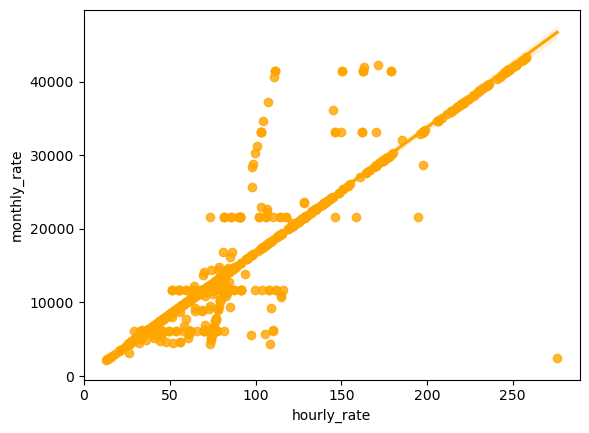

In [10]:
sns.regplot(x='hourly_rate', y='monthly_rate', color= 'orange', data=df)

Como en el caso anterior, existe una tendencia lineal con relación directa, que nos indica que cuanto mayor es el incremento de la tarifa cobrada por hora, 

mayor es el ingreso mensual, de manera proporcional y sin variaciones adicionales.

In [36]:
cross_tab_col_percent = pd.crosstab(df['attrition'], df['job_satisfaction'], normalize='columns') * 100
print(cross_tab_col_percent)

job_satisfaction       high        low     medium  very_high
attrition                                                   
no                84.199584  77.917981  82.450331  88.326848
yes               15.800416  22.082019  17.549669  11.673152


In [39]:
cross_tab_col_percent = pd.crosstab(df['attrition'], df['job_satisfaction'], normalize='index') * 100
print(cross_tab_col_percent)

job_satisfaction       high        low     medium  very_high
attrition                                                   
no                29.889299  18.228782  18.376384  33.505535
yes               29.343629  27.027027  20.463320  23.166023


En esta tabla de contingencia se aprecia entre otras cosas, como casi un 4% de las empleadas que abandonaron la compañía se encontraban con un nivel de 

satisfacción muy alto en las labores desempeñadas en su puesto de trabajo. Por otra parte, de las empleadas que continuan en la plantilla, un 15.3% se 

siente con un nivel de satisfacción bajo.

## Comenterios
1. la cross_tab_col debería estar ordenada de forma creciente o decreciente - mirar los valores de jobb_satisfaction
2. creo que esta debería ser la segunda figura que mostremos - se puede presentar ocn la table y con barras por porcentajes
3. no usaría el 'all' usaria el 'columns' o algo así

##

In [12]:
def categorizar_edad(edad):
    if edad < 30:
        return 'jovenes'
    elif 30 <= edad < 50:
        return 'mediana_edad'
    else:
        return 'senior'

In [13]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['grupo_edad'] = df['age'].apply(categorizar_edad)
df['Attrition_Edad'] = df['attrition'] + ' - ' + df['grupo_edad']

In [14]:
conteo = df.groupby(['grupo_edad', 'attrition']).size().reset_index(name='count')
conteo['percentage'] = conteo.groupby('grupo_edad')['count'].transform(lambda x: 100 * x / x.sum())


In [15]:
# no se ordena!!no se por qué
df['grupo_edad'] = pd.Categorical(df['grupo_edad'], categories=['jovenes', 'mediana_edad', 'senior'], ordered=True)
df_sorted = df.sort_values('grupo_edad')

# quizás puedas agregar una dimensión de orden como lo hiciste más adelante

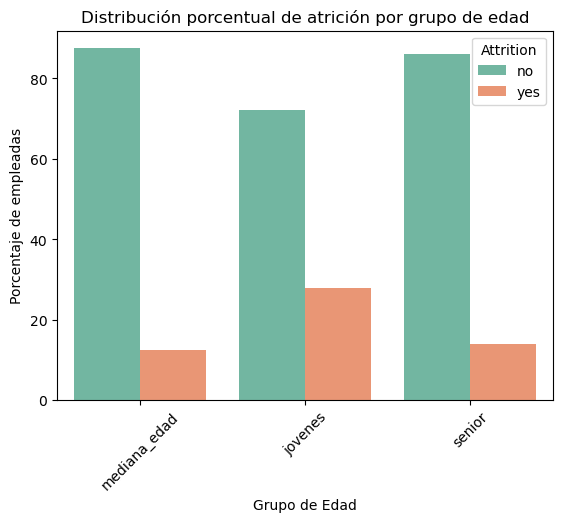

In [16]:

conteo = df.groupby(['grupo_edad', 'attrition']).size().reset_index(name='count')

conteo['percentage'] = conteo.groupby('grupo_edad')['count'].transform(lambda x: 100 * x / x.sum())

orden_edad = df['grupo_edad'].value_counts().index

sns.barplot(
    data=conteo,
    x='grupo_edad',
    y='percentage',
    hue='attrition',
    palette='Set2',
    order=orden_edad
)

plt.xticks(rotation=45)
plt.xlabel("Grupo de Edad")
plt.ylabel("Porcentaje de empleadas")
plt.title("Distribución porcentual de atrición por grupo de edad")
plt.legend(title="Attrition")
plt.show()


Las empleadas jóvenes presentan la mayor tasa de abandono dentro de la empresa con un 28%.

En comparación, solo alrededor del 12% de las empleadas de mediana edad y el 14% de las seniors abandonan, lo que sugiere mayor estabilidad en estos grupos.

In [17]:
df['job_involvement'].unique()

array(['high', 'medium', 'very_high', 'low'], dtype=object)

In [18]:
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})

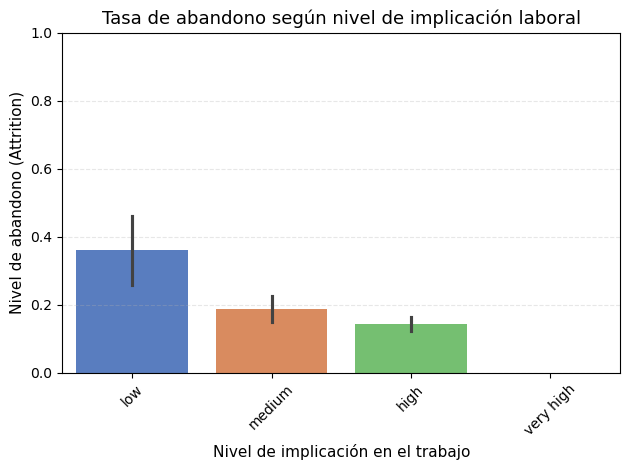

In [19]:
orden = ['low', 'medium', 'high', 'very high']


sns.barplot(
    x='job_involvement',
    y='attrition_bin',
    data=df,
    #ci='sd', # le saqué esto y parece más razonable el Intervalo de confianza que aparece, no me queda claro por que, pero creo que es mejor así
    palette='muted',
    order=orden 
)

plt.title("Tasa de abandono según nivel de implicación laboral", fontsize=13)
plt.xlabel("Nivel de implicación en el trabajo", fontsize=11)
plt.ylabel("Nivel de abandono (Attrition)", fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# esta gráfica está muy buena, la podríamos usar con la tabla de contingencia? para la segunda figura?

In [20]:
from scipy.stats import f_oneway
grupo_low = df[df['job_involvement'] == 'low']['attrition_bin']
grupo_medium = df[df['job_involvement'] == 'medium']['attrition_bin']
grupo_high = df[df['job_involvement'] == 'high']['attrition_bin']
grupo_very_high = df[df['job_involvement'] == 'very_high']['attrition_bin']

f_stat, p_value = f_oneway(grupo_low, grupo_medium, grupo_high, grupo_very_high)

print(f"F = {f_stat:.3f}, p = {p_value:.3f}")

F = 12.680, p = 0.000


F = 12.68 → hay una diferencia moderada entre las medias de los grupos comparados.

p = 0.000 → es mucho menor que 0.05, lo que indica que la diferencia entre al menos dos de los grupos es estadísticamente significativa.

Por lo que podemos concluir que el nivel de implicación laboral influye significativamente en la tasa de abandono, siendo el grupo de personas que menos 

implicación tenía con la empresa, el que mayor tasa de abandono presentó.

## Comentarios
1. estas pruebas estadísticas están buenas, pero quizás deberíamos hacer pruebas no paramétricas, porque las muestras son pequeñas y no son distribuciones normales.
2. estos tests están buenos para varias de las variables que estamos comparando - pero sobre todo Attrition y Satisfacción con el trabajo

In [21]:
# esto de abajo, ni idea, por qué lo hice? no lo sé ¿? lo quito??

# esto de abajo es una comparación de medias de atrición de todo los grupos de job_involvment uno a uno! es muy bueno
# Lo podemos usar para comparar todas las variables y nos da información valiosa!!  

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],            
    groups=df['job_involvement'],        
    alpha=0.05                            
)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  high       low   0.2161    0.0  0.1126  0.3196   True
  high    medium   0.0437 0.1765 -0.0116  0.0991  False
  high very_high  -0.0581 0.2318  -0.137  0.0209  False
   low    medium  -0.1724 0.0003 -0.2817  -0.063   True
   low very_high  -0.2742    0.0 -0.3972 -0.1512   True
medium very_high  -0.1018 0.0133 -0.1883 -0.0154   True
-------------------------------------------------------


In [23]:
conteo = df.groupby(['marital_status', 'overtime']).size().reset_index(name='count')
conteo['percentage'] = conteo.groupby('marital_status')['count'].transform(lambda x: 100 * x / x.sum())
orden_marital = df['marital_status'].value_counts().index

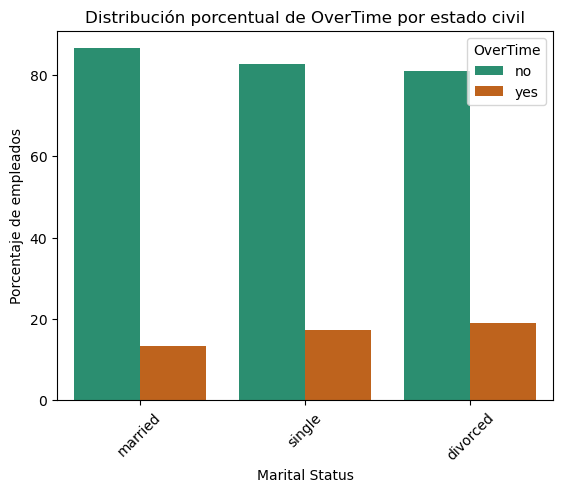

In [24]:

sns.barplot(
    data=conteo,
    x='marital_status',
    y='percentage',
    hue='overtime',
    palette='Dark2',
    order=orden_marital
)

plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Porcentaje de empleados")
plt.title("Distribución porcentual de OverTime por estado civil")
plt.legend(title="OverTime")
plt.show()


Dentro del grupo de empleadas que hacen horas extra, existe muy poca diferencia entre aquellas que se encuentran solteras y divorciadas. Podemos 

observar que aquellas que están casadas hacen menos horas extra, si bien, tampoco es una diferencia significativa, respecto a sus compañeras que no lo 

están.

## Comentario
Si bien es una comparación interesante para nosotras, lo importante es ver si estas variables también afectan nuestros outcomes, no tanto como se vinculan entre ellas. No perdamos de vista cual es nuestra pregunta de investigación u objetivo del análisis

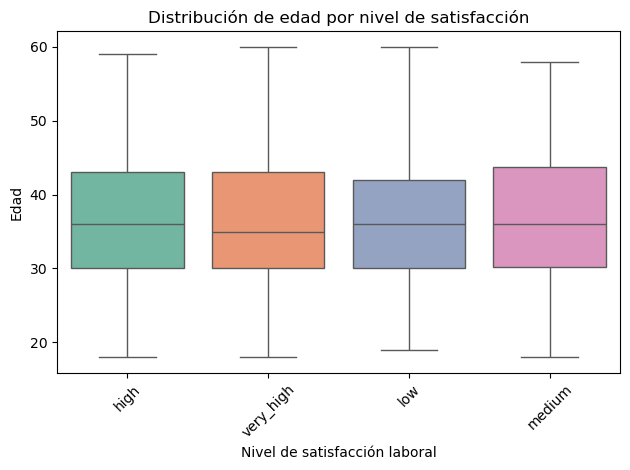

In [25]:
sns.boxplot(
    x='job_satisfaction',   
    y='age',               
    data=df,
    palette='Set2'
)

plt.title("Distribución de edad por nivel de satisfacción")
plt.xlabel("Nivel de satisfacción laboral")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En todos los casos, la mayoría de las empleadas tienen entre 30 y 45 años.

Los valores medianos (línea central de cada caja) rondan de los 35 a 37 años.

No hay grandes diferencias en edad entre quienes tienen baja o alta satisfacción.

Todos los niveles de satisfacción tienen una amplia dispersión de edades, lo que sugiere que la edad no influye directamente en cómo valoran su 

satisfacción laboral.

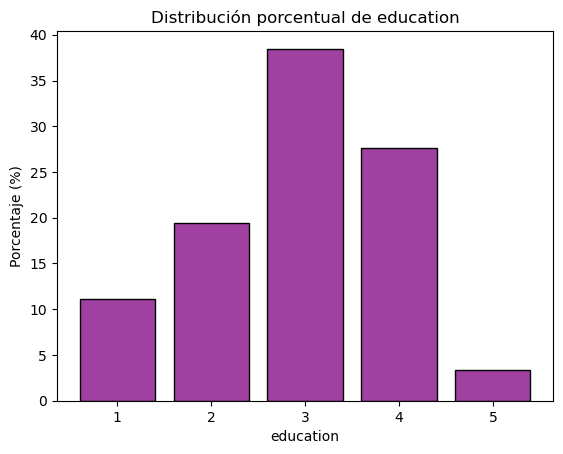

In [26]:
sns.histplot(
    data=df,
    x='education',
    stat='percent',         
    discrete=True,         
    shrink=0.8,             
    color='purple'
)

plt.ylabel('Porcentaje (%)')
plt.title('Distribución porcentual de education')
plt.show()

Aproximadamente el 38% de las empleadas cuentan con un nivel educativo con valor 3, que en la siguiente gráfica detallaremos que tipo de estudios son. 

## Comentarios
1. sabemos que valor es el valor 3? Se lo deberíamos preguntar a Laura?
2. como se correlaciona la educación con nuestras variables de outcome? Esto es siempre muy importante

In [27]:
def cat_plot(df, columns):
    for col in columns:
        absolute_frequency = df[col].value_counts()
        relative_frequency = df[col].value_counts(normalize=True) * 100
        print(relative_frequency)
        # creamos un DataFrame para mostrar ambas tablas
        frequency_table = pd.DataFrame({col: absolute_frequency.index,
                                        'Absolute Frequency': absolute_frequency.values,
                                        'Relative Frequency (%)': relative_frequency.values
                                        })
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        # Gráfico de barras para la frecuencia absoluta
        sns.barplot(x=col,
                    y='Absolute Frequency',
                    data=frequency_table, color= 'orange',ax=axes[0])
        axes[0].set_title(f'Absolute Frequency for {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Absolute Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        # Gráfico de barras para la frecuencia relativa
        sns.barplot(x=col, y='Relative Frequency (%)', data=frequency_table, ax=axes[1])
        axes[1].set_title(f'Relative Frequency for {col}')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Relative Frequency (%)')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout();

education_field
life_sciences       40.161105
medical             31.760644
marketing           11.967779
technical_degree     7.940161
other                6.789413
human_resources      1.380898
Name: proportion, dtype: float64


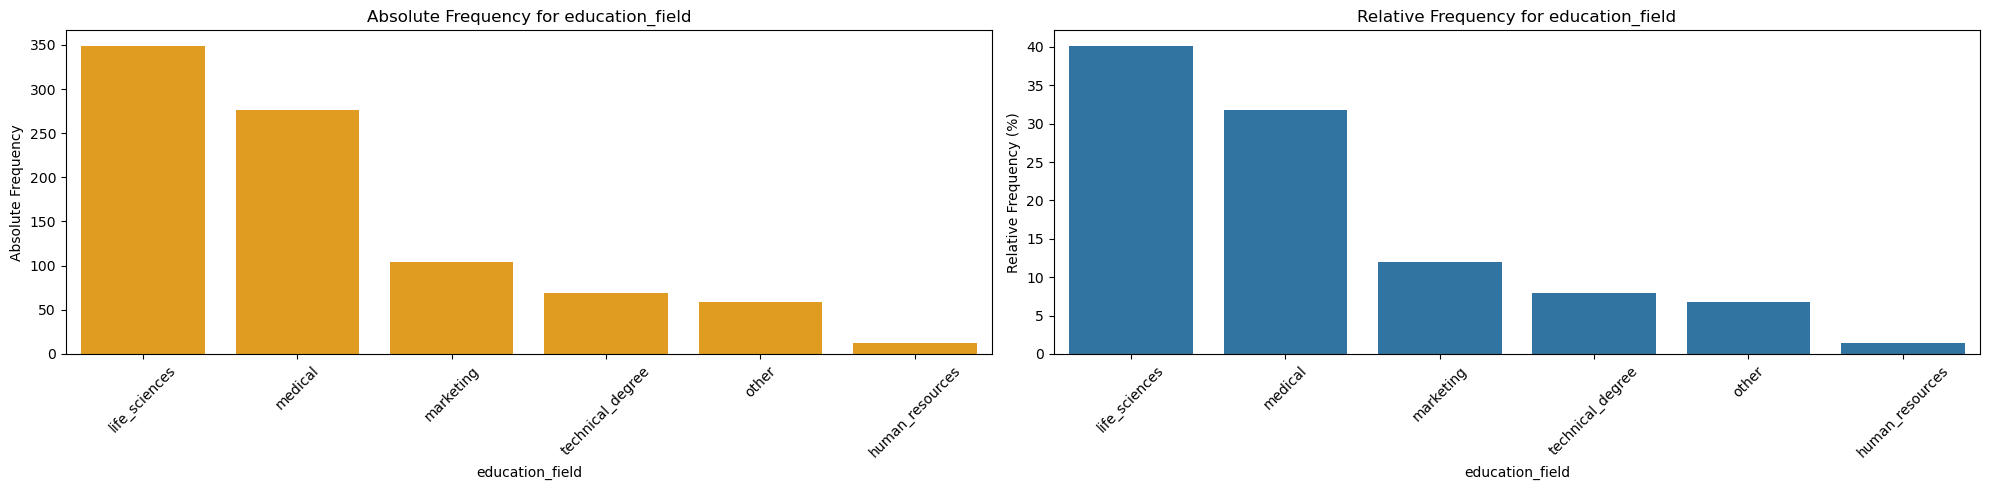

In [28]:
cat_plot(df, ['education_field'])

Los datos revelan que más del 40% de las empleadas tienen formación en ciencias biológicas, el segundo grupo lo conformaría las empleadas con formación en 

medicina, contando con casi un 32%. Por otro lado, sólo algo más del 1% tiene formación en recursos humanos. Determinamos que las empleadas con formación 

en ciencias son la mayoría, ya que entre los dos grupos mayoritarios suman más de un 70%.

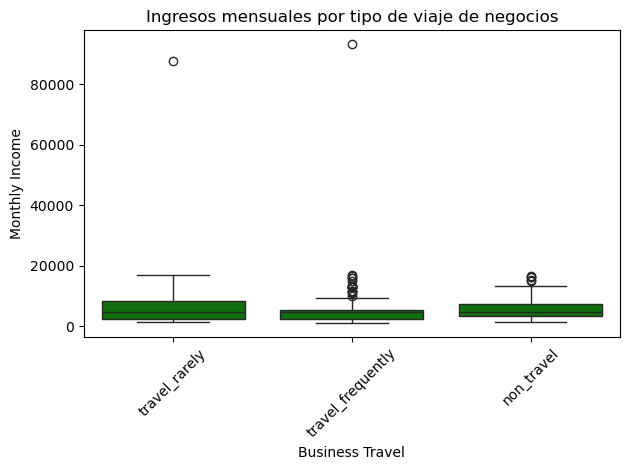

In [29]:
sns.boxplot(data=df, color='green', x='business_travel', y='monthly_income')
plt.title("Ingresos mensuales por tipo de viaje de negocios")
plt.xlabel("Business Travel")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El grupo que viaja raramente tiene una mediana de ingresos más alta que los otros dos grupos.

Viajar con frecuencia no implica mayor salario: su mediana es más baja.

Hay valores atípicos (outliers) en los tres grupos,con algunos salarios que superan los 80.000.

## Comentario
Es importante ver como se relacionan estas variables con nuestras variables de resultado (outcome)!

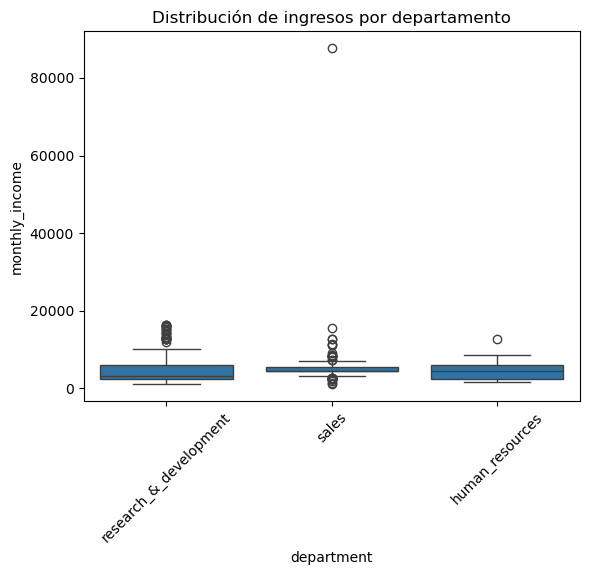

In [30]:
sns.boxplot(x="department", y="monthly_income", data=df)
plt.title("Distribución de ingresos por departamento")
plt.xticks(rotation=45)
plt.show()

La mediana (línea dentro de cada caja) está alrededor de:

research & development: -5.000

sales: -6.000

human resources: -4.500

Todos los departamentos tienen outliers, siendo ventas el más llamativo, con un outlier que supera los 90.000.

La dispersión (altura de las cajas) indica que sales y r&d tienen ingresos más variados que human resources.

Aunque los ingresos medios son similares entre departamentos, el área de ventas tiene empleadas con ingresos notablemente más altos, posiblemente por comisiones u otros factores variables.

## Comentarios
1. Hacer gráficos con los valores imputados también
2. Fijarnos en que categorias caen los valores que imputamos o los valores que tienen missing en la variable salary.

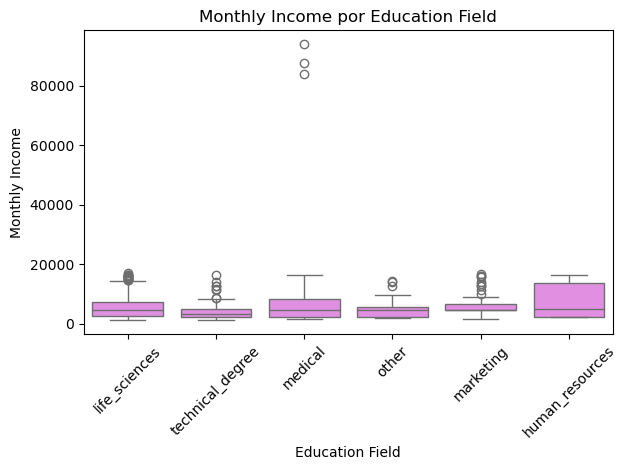

In [31]:
sns.boxplot(data=df, color= 'violet', x='education_field', y='monthly_income')
plt.title("Monthly Income por Education Field")
plt.xlabel("Education Field")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La mediana de ingresos está alrededor de:

medical: -6.000–7.000

life_sciences, marketing, human_resources: -5.000

technical_degree, other: -4.000

El campo medical presenta varios outliers extremos, con sueldos que superan los 90.000 mensuales.

Los ingresos son más homogéneos en technical_degree y other, mientras que en medical y life_sciences hay mayor dispersión (variedad)

Las personas con formación en medicina y ciencias de la vida tienden a tener ingresos más altos y variables, mientras que quienes estudiaron técnicas u 

otras áreas presentan ingresos más bajos y estables.

## Comentarios
1. Importante recordar cual es el objetivo de nuestro análisis! 
2. Si al comienzo queremos presentar información descriptiva de toda la muestra, podemos hacer una tabla mostrando como de distribuyen los datos, sobre todo los demográficos

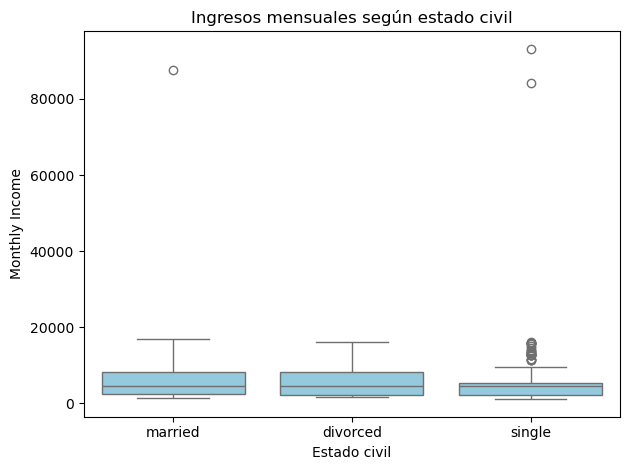

In [32]:
sns.boxplot(data=df,color='skyblue', x='marital_status', y='monthly_income')
plt.title("Ingresos mensuales según estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Monthly Income")
plt.tight_layout()
plt.show()

No hay una gran diferencia en los ingresos habituales según el estado civil, pero las personas solteras muestran mayor dispersión y más casos de ingresos 

muy elevados.

## Comentarios
1. Importante recordar cual es el objetivo de nuestro análisis! 
2. Si al comienzo queremos presentar información descriptiva de toda la muestra, podemos hacer una tabla mostrando como de distribuyen los datos, sobre todo los demográficos

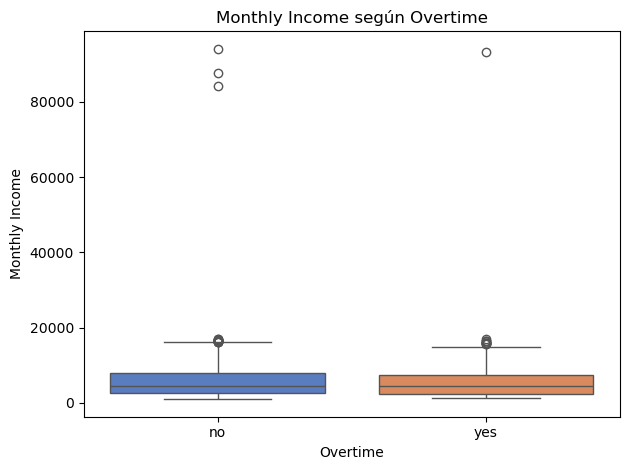

In [33]:
sns.boxplot(data=df,palette='muted', x='overtime', y='monthly_income')
plt.title("Monthly Income según Overtime")
plt.xlabel("Overtime")
plt.ylabel("Monthly Income")
plt.tight_layout()
plt.show()

La mediana del ingreso mensual es más alta en el grupo "no overtime" (alrededor de 6.000), frente a -4.500 en el grupo que si hicieron horas extra.

Ambos grupos tienen outliers con ingresos superiores a los 90.000, aunque son casos excepcionales.

La dispersión de salarios es algo mayor entre quienes no hacen horas extra.

Aunque se podría pensar lo contrario, los empleados que no hacen horas extra suelen tener mejores salarios base, lo que sugiere que el trabajo extra no 

siempre está ligado a mayores ingresos

## Comentario
Importante recordar cual es el objetivo de nuestro análisis! Tenemos que tener en cuenta que lo más importante es la relaci´pn de las variables con nuestras resultados (outcomes)

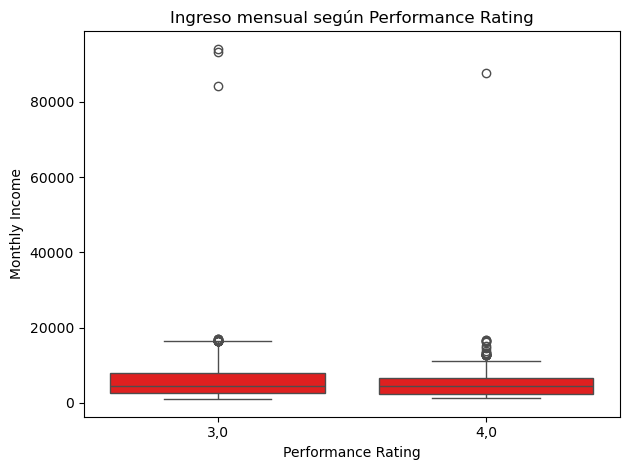

In [34]:
sns.boxplot(data=df, color='red', x='performance_rating', y='monthly_income')
plt.title("Ingreso mensual según Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Monthly Income")
plt.tight_layout()
plt.show()

Los ingresos mensuales no varían mucho entre empleadas con calificación de desempeño 3 y 4. Ambos grupos presentan ingresos similares, aunque hay 

algunos casos con sueldos muy altos (outliers).

La mediana de ingresos es ligeramente superior en quienes tienen calificación 3 (alrededor de 6.000) frente a los de 4 (alrededor de 5.000).

Hay outliers en ambos grupos, con ingresos que superan los 90.000.

La dispersión de salarios es algo mayor en el grupo con calificación 3, lo que indica mayor variabilidad.

A pesar de tener mejor calificación, las empleadas con nivel 4 no ganan significativamente más que las de nivel 3, lo que podría sugerir que la evaluación 

de desempeño no está fuertemente ligada al salario en esta empresa.

## Comentario
Importante recordar cual es el objetivo de nuestro análisis! Tenemos que tener en cuenta que lo más importante es la relaci´pn de las variables con nuestras resultados (outcomes)

